#**KNN Classification using Scikit-learn and the Iris dataset**

**DATASET:**

*   An Iris dataset from the UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/iris
*   The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant.

*Attributes:*

*   sepal length in cm
*   sepal width in cm
*   petal length in cm
*   petal width in cm

*Classes:*

*   Iris Setosa
*   Iris Versicolour
*   Iris Virginica

**AIM:**

*   To apply K-Nearest Neighbour classification model on Iris Dataset and compute its accuracy.

**EVALUATION/OUTPUT**: 

*   Confusion matrix showing the false positive, false negatives.
*   Model Accuracy

In [ ]:
# STEP 1: Importing all the required libraries.

# Libraries for data analysis
import numpy as np # For large multi-dimensional array and matrix processing
import pandas as pd # For data extraction and preparation

# Libraries for data pre-processing
from sklearn import datasets
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split

# Scikit-learn supports most of the supervised and unsupervised learning algorithm
from sklearn.neighbors import KNeighborsClassifier

# Libraries for displaying results and analysis
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score

##Dataset

* For reading the data we are using read_csv function provided by pandas. It reads a data file into a DataFrame.

* Data preprocessing is an important step in ML as the quality of data and the useful information that can be derived from it directly affects the ability of our model to learn. Therefore, it is extremely important that we preprocess our data before feeding it into our model.

* Irregular distribution of values may suffer from poor performance during learning and sensitivity to input values resulting in higher error.

In [ ]:
# STEP 2: Data Preprocessing

# STEP 2.1: Read Data From CSV or use datasets provided by sklearn library
# dataset = pd.read_csv('Iris.csv')

iris = datasets.load_iris()

print(iris)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [ ]:
# STEP 2.2: Divide data into features and labels
X = iris.data # features array
y = iris.target # labels array

# STEP 2.3: Handle Missing data
# There are mainly two ways to handle missing data. We can delete that particular row, or we can compute the mean and 
# replace the missing value with the mean. 

# Iris dataset is perhaps the best known database to be found with no missing values.

# STEP 2.4: Encode Categorical data

# Labels, as we can see, are categorical. String labels are not accepted by KNeighborsClassifier. 
# To convert them to numbers, we'll need to utilise LabelEncoder. 
# Iris-setosa is equal to 0, Iris-versicolor is equal to 1, and Iris-virginica is equal to 2.

# le = LabelEncoder()
# y = le.fit_transform(y)

We then divide our dataset into a training set and a test set. This is an important step since it allows us to improve the performance of our machine learning model. By using similar data for training and testing, you can minimize the effects of data discrepancies and better understand the characteristics of the model.

**Training Set:** A subset of dataset to train the machine learning model, and we already know the output.

**Test set:** A subset of dataset to test the machine learning model, and by using the test set, model predicts the output.

In [ ]:
# STEP 2.5: Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# "test_size" attribute is the fraction of the data that should be held over for testing. 
# It's usually around 80/20 or 70/30.

Feature scaling is the final step of data preprocessing in machine learning. It is a technique to standardize the independent variables of the dataset in a specific range. In feature scaling, we put our variables in the same range and in the same scale so that no variable dominates one another.

There are some feature scaling techniques such as Normalization and Standardization.

In [ ]:
# STEP 2.6: Transform features by scaling each feature to a given range.

# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler(feature_range=(0, 1))
# X = scaler.fit_transform(X)

# In IRIS Dataset, since all the features values are in the same order of magnitude, there is no need for feature scaling. 
# Otherwise, it is extremly important to apply feature scaling before running classification algorithms.

In [ ]:
# STEP 3: Model Learning

# Instantiate learning model (k = 3)
classifier = KNeighborsClassifier(n_neighbors=3)

# Fitting the model
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
# STEP 4: Making predictions

# Predicting the Test set results
y_pred = classifier.predict(X_test)
print(X_test)

[[5.8 2.8 5.1 2.4]
 [6.  2.2 4.  1. ]
 [5.5 4.2 1.4 0.2]
 [7.3 2.9 6.3 1.8]
 [5.  3.4 1.5 0.2]
 [6.3 3.3 6.  2.5]
 [5.  3.5 1.3 0.3]
 [6.7 3.1 4.7 1.5]
 [6.8 2.8 4.8 1.4]
 [6.1 2.8 4.  1.3]
 [6.1 2.6 5.6 1.4]
 [6.4 3.2 4.5 1.5]
 [6.1 2.8 4.7 1.2]
 [6.5 2.8 4.6 1.5]
 [6.1 2.9 4.7 1.4]
 [4.9 3.6 1.4 0.1]
 [6.  2.9 4.5 1.5]
 [5.5 2.6 4.4 1.2]
 [4.8 3.  1.4 0.3]
 [5.4 3.9 1.3 0.4]
 [5.6 2.8 4.9 2. ]
 [5.6 3.  4.5 1.5]
 [4.8 3.4 1.9 0.2]
 [4.4 2.9 1.4 0.2]
 [6.2 2.8 4.8 1.8]
 [4.6 3.6 1.  0.2]
 [5.1 3.8 1.9 0.4]
 [6.2 2.9 4.3 1.3]
 [5.  2.3 3.3 1. ]
 [5.  3.4 1.6 0.4]]


Accuracy of our model is equal 96.67 %.


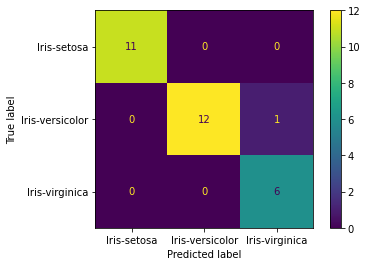

In [ ]:
# STEP 5: Determine the Accuracy of your model.

cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['Iris-setosa','Iris-versicolor','Iris-virginica'])
cmd.plot()

accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy of our model is equal ' + str(round(accuracy, 2)) + ' %.')

**RESULT**: We have successfuly applied the K-Nearest Neighbour classification model on Iris Dataset and calculated its accuracy.